In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import pickle
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
colors_plain = ['#333333', '#1F77B4', 'grey']

In [2]:
def get_coefs(fname, tmin = 20, tmax = 40):
    coefs = pd.read_csv('Data/'+fname)
    coefs.columns = ['x', 'coef', 'se', 't', 'p', 'conf_int_l', 'conf_int_u']
    xs = []
    ls = []
    us = []
    ts = []
    for t in range(tmin, tmax+1):
        try:
            if t < tmax:
                temp = coefs[coefs.x == 'cut_maxtemp(%d,%d]' % (t, t+1)]
            else:
                temp = coefs[coefs.x == 'cut_maxtemp(%d, Inf]' % t]
            xs.append(temp.coef.iloc[0])
            ls.append(temp.conf_int_l.iloc[0])
            us.append(temp.conf_int_u.iloc[0])
            ts.append(t)
        except:
            pass
    return xs, ls, us, ts

## Fig. 1a

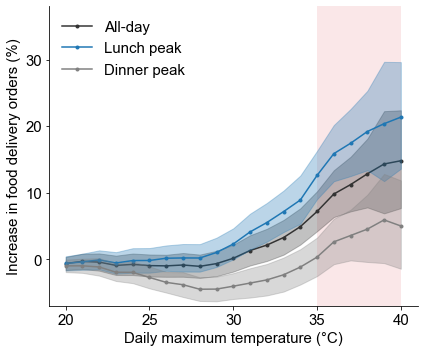

In [3]:
plt.figure(figsize = (6, 5))
xs, ls, us, ts = get_coefs('city_4year_040_cnt.csv')
plt.plot(ts, np.exp(xs) - 1, color = colors_plain[0], marker = '.', label = 'All-day', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = colors_plain[0], alpha = 0.3, zorder = 1)
xs, ls, us, ts = get_coefs('city_4year_040_noon_cnt.csv')
plt.plot(ts, np.exp(xs) - 1, color = colors_plain[1], marker = '.', label = 'Lunch peak', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = colors_plain[1], alpha = 0.3, zorder = 1)
xs, ls, us, ts = get_coefs('city_4year_040_evening_cnt.csv')
plt.plot(ts, np.exp(xs) - 1, color = colors_plain[2], marker = '.', label = 'Dinner peak', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = colors_plain[2], alpha = 0.3, zorder = 1)
plt.xlim(19, 41)
plt.ylim(-0.07, 0.38)
plt.bar(x = [37.5], height = [0.48], width = 5, bottom = [-0.07], color = '#eea2a4', alpha = 0.25, zorder = 0)
plt.yticks([0, 0.1, 0.2, 0.3], [0, 10, 20, 30], size = 15)
plt.xticks([20, 25, 30, 35, 40], size = 15)
celsius_symbol = chr(176)
plt.xlabel('Daily maximum temperature ('+celsius_symbol+'C)', size = 15)
plt.ylabel('Increase in food delivery orders (%)', size = 15)
plt.legend(fontsize = 15, frameon = False, loc = 'upper left')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

## Fig. 1b

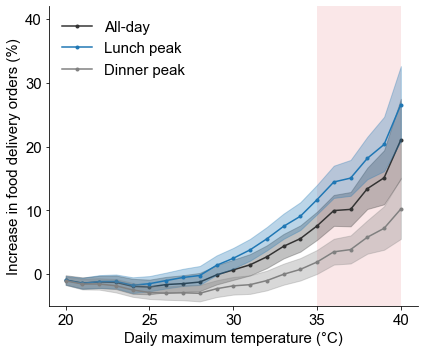

In [4]:
plt.figure(figsize = (6, 5))
xs, ls, us, ts = get_coefs('neighbour_4year_cnt.csv')
plt.plot(ts, np.exp(xs) - 1, color = colors_plain[0], marker = '.', label = 'All-day', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = colors_plain[0], alpha = 0.3, zorder = 1)
xs, ls, us, ts = get_coefs('neighbour_4year_noon_cnt.csv')
plt.plot(ts, np.exp(xs) - 1, color = colors_plain[1], marker = '.', label = 'Lunch peak', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = colors_plain[1], alpha = 0.3, zorder = 1)
xs, ls, us, ts = get_coefs('neighbour_4year_evening_cnt.csv')
plt.plot(ts, np.exp(xs) - 1, color = colors_plain[2], marker = '.', label = 'Dinner peak', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = colors_plain[2], alpha = 0.3, zorder = 1)
plt.ylim(-0.05, 0.42)
plt.bar(x = [37.5], height = [0.47], width = 5, bottom = [-0.05], color = '#eea2a4', alpha = 0.25, zorder = 0)
plt.xlim(19, 41)
plt.yticks([0, 0.1, 0.2, 0.3, 0.4], [0, 10, 20, 30, 40], size = 15)
plt.xticks([20, 25, 30, 35, 40], size = 15)
celsius_symbol = chr(176)
plt.xlabel('Daily maximum temperature ('+celsius_symbol+'C)', size = 15)
plt.ylabel('Increase in food delivery orders (%)', size = 15)
plt.legend(fontsize = 15, frameon = False, loc = 'upper left')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

## Fig. 1c

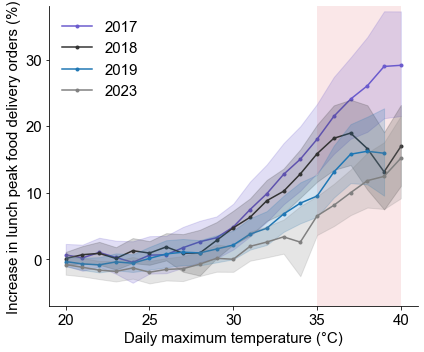

In [5]:
plt.figure(figsize = (6, 5))
xs, ls, us, ts = get_coefs('city_17_040_noon_cnt.csv')
plt.plot(ts, np.exp(xs) - 1, color = '#6A5ACD', marker = '.', label = '2017', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = '#6A5ACD', alpha = 0.2, zorder = 1)
xs, ls, us, ts = get_coefs('city_18_040_noon_cnt.csv')
plt.plot(ts, np.exp(xs) - 1, color = colors_plain[0], marker = '.', label = '2018', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = colors_plain[0], alpha = 0.2, zorder = 1)
xs, ls, us, ts = get_coefs('city_19_040_noon_cnt.csv')
plt.plot(ts, np.exp(xs) - 1, color = colors_plain[1], marker = '.', label = '2019', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = colors_plain[1], alpha = 0.2, zorder = 1)
xs, ls, us, ts = get_coefs('city_23_040_noon_cnt.csv')
plt.plot(ts, np.exp(xs) - 1, color = colors_plain[2], marker = '.', label = '2023', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = colors_plain[2], alpha = 0.2, zorder = 1)
plt.xlim(19, 41)
plt.ylim(-0.07, 0.38)
plt.bar(x = [37.5], height = [0.48], width = 5, bottom = [-0.07], color = '#eea2a4', alpha = 0.25, zorder = 0)
plt.yticks([0, 0.1, 0.2, 0.3], [0, 10, 20, 30], size = 15)
plt.xticks([20, 25, 30, 35, 40], size = 15)
celsius_symbol = chr(176)
plt.xlabel('Daily maximum temperature ('+celsius_symbol+'C)', size = 15)
plt.ylabel('Increase in lunch peak food delivery orders (%)', size = 15)
plt.legend(fontsize = 15, frameon = False, loc = 'upper left')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.title('City-level', size = 17)
plt.tight_layout()
plt.show()

## Fig. S2

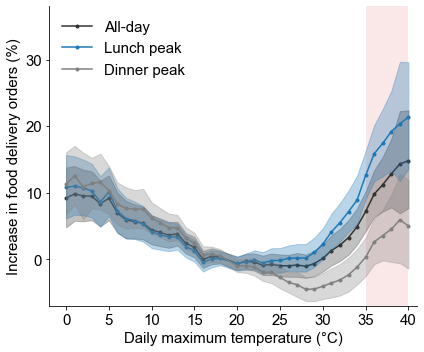

In [6]:
plt.figure(figsize = (6, 5))
xs, ls, us, ts = get_coefs('city_4year_040_cnt.csv', tmin = -1)
plt.plot(ts, np.exp(xs) - 1, color = colors_plain[0], marker = '.', label = 'All-day', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = colors_plain[0], alpha = 0.3, zorder = 1)
xs, ls, us, ts = get_coefs('city_4year_040_noon_cnt.csv', tmin = -1)
plt.plot(ts, np.exp(xs) - 1, color = colors_plain[1], marker = '.', label = 'Lunch peak', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = colors_plain[1], alpha = 0.3, zorder = 1)
xs, ls, us, ts = get_coefs('city_4year_040_evening_cnt.csv', tmin = -1)
plt.plot(ts, np.exp(xs) - 1, color = colors_plain[2], marker = '.', label = 'Dinner peak', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = colors_plain[2], alpha = 0.3, zorder = 1)
plt.xlim(-2, 41)
plt.ylim(-0.07, 0.38)
plt.bar(x = [37.5], height = [0.48], width = 5, bottom = [-0.07], color = '#eea2a4', alpha = 0.25, zorder = 0)
plt.yticks([0, 0.1, 0.2, 0.3], [0, 10, 20, 30], size = 15)
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40], size = 15)
celsius_symbol = chr(176)
plt.xlabel('Daily maximum temperature ('+celsius_symbol+'C)', size = 15)
plt.ylabel('Increase in food delivery orders (%)', size = 15)
plt.legend(fontsize = 15, frameon = False, loc = 'upper left')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

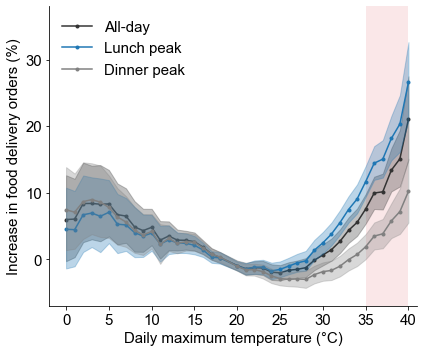

In [7]:
plt.figure(figsize = (6, 5))
xs, ls, us, ts = get_coefs('neighbour_4year_cnt.csv', tmin = -1)
plt.plot(ts, np.exp(xs) - 1, color = colors_plain[0], marker = '.', label = 'All-day', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = colors_plain[0], alpha = 0.3, zorder = 1)
xs, ls, us, ts = get_coefs('neighbour_4year_noon_cnt.csv', tmin = -1)
plt.plot(ts, np.exp(xs) - 1, color = colors_plain[1], marker = '.', label = 'Lunch peak', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = colors_plain[1], alpha = 0.3, zorder = 1)
xs, ls, us, ts = get_coefs('neighbour_4year_evening_cnt.csv', tmin = -1)
plt.plot(ts, np.exp(xs) - 1, color = colors_plain[2], marker = '.', label = 'Dinner peak', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = colors_plain[2], alpha = 0.3, zorder = 1)
plt.ylim(-0.07, 0.38)
plt.bar(x = [37.5], height = [0.47], width = 5, bottom = [-0.07], color = '#eea2a4', alpha = 0.25, zorder = 0)
plt.xlim(-2, 41)
plt.yticks([0, 0.1, 0.2, 0.3], [0, 10, 20, 30], size = 15)
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40], size = 15)
celsius_symbol = chr(176)
plt.xlabel('Daily maximum temperature ('+celsius_symbol+'C)', size = 15)
plt.ylabel('Increase in food delivery orders (%)', size = 15)
plt.legend(fontsize = 15, frameon = False, loc = 'upper left')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

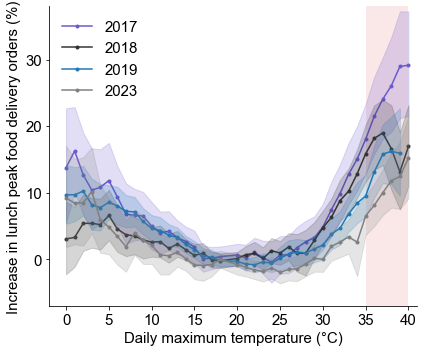

In [8]:
plt.figure(figsize = (6, 5))
xs, ls, us, ts = get_coefs('city_17_040_noon_cnt.csv', tmin = -1)
plt.plot(ts, np.exp(xs) - 1, color = '#6A5ACD', marker = '.', label = '2017', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = '#6A5ACD', alpha = 0.2, zorder = 1)
xs, ls, us, ts = get_coefs('city_18_040_noon_cnt.csv', tmin = -1)
plt.plot(ts, np.exp(xs) - 1, color = colors_plain[0], marker = '.', label = '2018', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = colors_plain[0], alpha = 0.2, zorder = 1)
xs, ls, us, ts = get_coefs('city_19_040_noon_cnt.csv', tmin = -1)
plt.plot(ts, np.exp(xs) - 1, color = colors_plain[1], marker = '.', label = '2019', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = colors_plain[1], alpha = 0.2, zorder = 1)
xs, ls, us, ts = get_coefs('city_23_040_noon_cnt.csv', tmin = -1)
plt.plot(ts, np.exp(xs) - 1, color = colors_plain[2], marker = '.', label = '2023', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = colors_plain[2], alpha = 0.2, zorder = 1)
plt.xlim(-2, 41)
plt.ylim(-0.07, 0.38)
plt.bar(x = [37.5], height = [0.48], width = 5, bottom = [-0.07], color = '#eea2a4', alpha = 0.25, zorder = 0)
plt.yticks([0, 0.1, 0.2, 0.3], [0, 10, 20, 30], size = 15)
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40], size = 15)
celsius_symbol = chr(176)
plt.xlabel('Daily maximum temperature ('+celsius_symbol+'C)', size = 15)
plt.ylabel('Increase in lunch peak food delivery orders (%)', size = 15)
plt.legend(fontsize = 15, frameon = False, loc = 'upper left')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

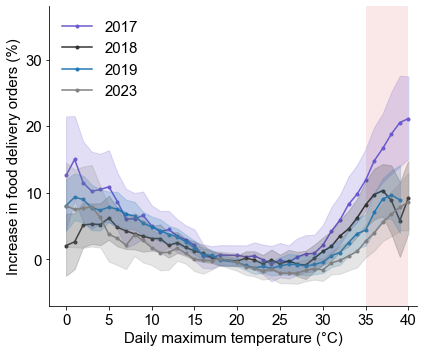

In [9]:
plt.figure(figsize = (6, 5))
xs, ls, us, ts = get_coefs('city_17_040_cnt.csv', tmin = -1)
plt.plot(ts, np.exp(xs) - 1, color = '#6A5ACD', marker = '.', label = '2017', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = '#6A5ACD', alpha = 0.2, zorder = 1)
xs, ls, us, ts = get_coefs('city_18_040_cnt.csv', tmin = -1)
plt.plot(ts, np.exp(xs) - 1, color = colors_plain[0], marker = '.', label = '2018', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = colors_plain[0], alpha = 0.2, zorder = 1)
xs, ls, us, ts = get_coefs('city_19_040_cnt.csv', tmin = -1)
plt.plot(ts, np.exp(xs) - 1, color = colors_plain[1], marker = '.', label = '2019', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = colors_plain[1], alpha = 0.2, zorder = 1)
xs, ls, us, ts = get_coefs('city_23_040_cnt.csv', tmin = -1)
plt.plot(ts, np.exp(xs) - 1, color = colors_plain[2], marker = '.', label = '2023', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = colors_plain[2], alpha = 0.2, zorder = 1)
plt.xlim(-2, 41)
plt.ylim(-0.04, 0.30)
plt.ylim(-0.07, 0.38)
plt.bar(x = [37.5], height = [0.48], width = 5, bottom = [-0.07], color = '#eea2a4', alpha = 0.25, zorder = 0)
plt.yticks([0, 0.1, 0.2, 0.3], [0, 10, 20, 30], size = 15)
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40], size = 15)
celsius_symbol = chr(176)
plt.xlabel('Daily maximum temperature ('+celsius_symbol+'C)', size = 15)
plt.ylabel('Increase in food delivery orders (%)', size = 15)
plt.legend(fontsize = 15, frameon = False, loc = 'upper left')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

## Fig. S3

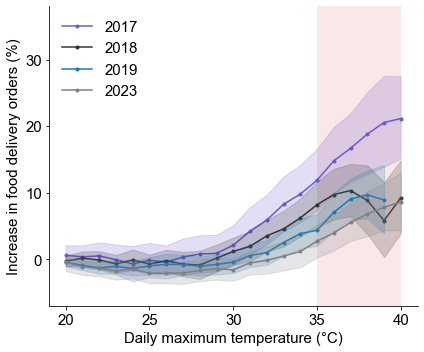

In [10]:
plt.figure(figsize = (6, 5))
xs, ls, us, ts = get_coefs('city_17_040_cnt.csv')
plt.plot(ts, np.exp(xs) - 1, color = '#6A5ACD', marker = '.', label = '2017', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = '#6A5ACD', alpha = 0.2, zorder = 1)
xs, ls, us, ts = get_coefs('city_18_040_cnt.csv')
plt.plot(ts, np.exp(xs) - 1, color = colors_plain[0], marker = '.', label = '2018', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = colors_plain[0], alpha = 0.2, zorder = 1)
xs, ls, us, ts = get_coefs('city_19_040_cnt.csv')
plt.plot(ts, np.exp(xs) - 1, color = colors_plain[1], marker = '.', label = '2019', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = colors_plain[1], alpha = 0.2, zorder = 1)
xs, ls, us, ts = get_coefs('city_23_040_cnt.csv')
plt.plot(ts, np.exp(xs) - 1, color = colors_plain[2], marker = '.', label = '2023', zorder = 1)
plt.fill_between(ts, np.exp(ls) - 1, np.exp(us) - 1, color = colors_plain[2], alpha = 0.2, zorder = 1)
plt.xlim(19, 41)
plt.ylim(-0.04, 0.30)
plt.ylim(-0.07, 0.38)
plt.bar(x = [37.5], height = [0.48], width = 5, bottom = [-0.07], color = '#eea2a4', alpha = 0.25, zorder = 0)
plt.yticks([0, 0.1, 0.2, 0.3], [0, 10, 20, 30], size = 15)
plt.xticks([20, 25, 30, 35, 40], size = 15)
celsius_symbol = chr(176)
plt.xlabel('Daily maximum temperature ('+celsius_symbol+'C)', size = 15)
plt.ylabel('Increase in food delivery orders (%)', size = 15)
plt.legend(fontsize = 15, frameon = False, loc = 'upper left')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


## Fig. S1

In [11]:
china_map = gpd.read_file('Data/maps/2023年地级/地级.shp')
china_province_map = gpd.read_file('Data/maps/2023年省级/省级.shp')
jiuduanxian = gpd.read_file('Data/maps/九段线/九段线.shp')
guojie = gpd.read_file('Data/maps/国界/国家矢量.shp')

In [12]:
city_order_nums = pd.read_csv('Data/city_order_ranking.csv')

In [13]:
with open('Data/china_ground_station.pkl', 'rb') as f:
    station_loc_dict = pickle.load(f)
gdfs = []
for stations in station_loc_dict:
    lat, lon = station_loc_dict[stations]
    point = Point(lon, lat)
    gdf0 = gpd.GeoDataFrame(geometry=[point], crs = 'EPSG:4326')
    gdfs.append(gdf0.copy())
gdfs = pd.concat(gdfs, ignore_index = True)

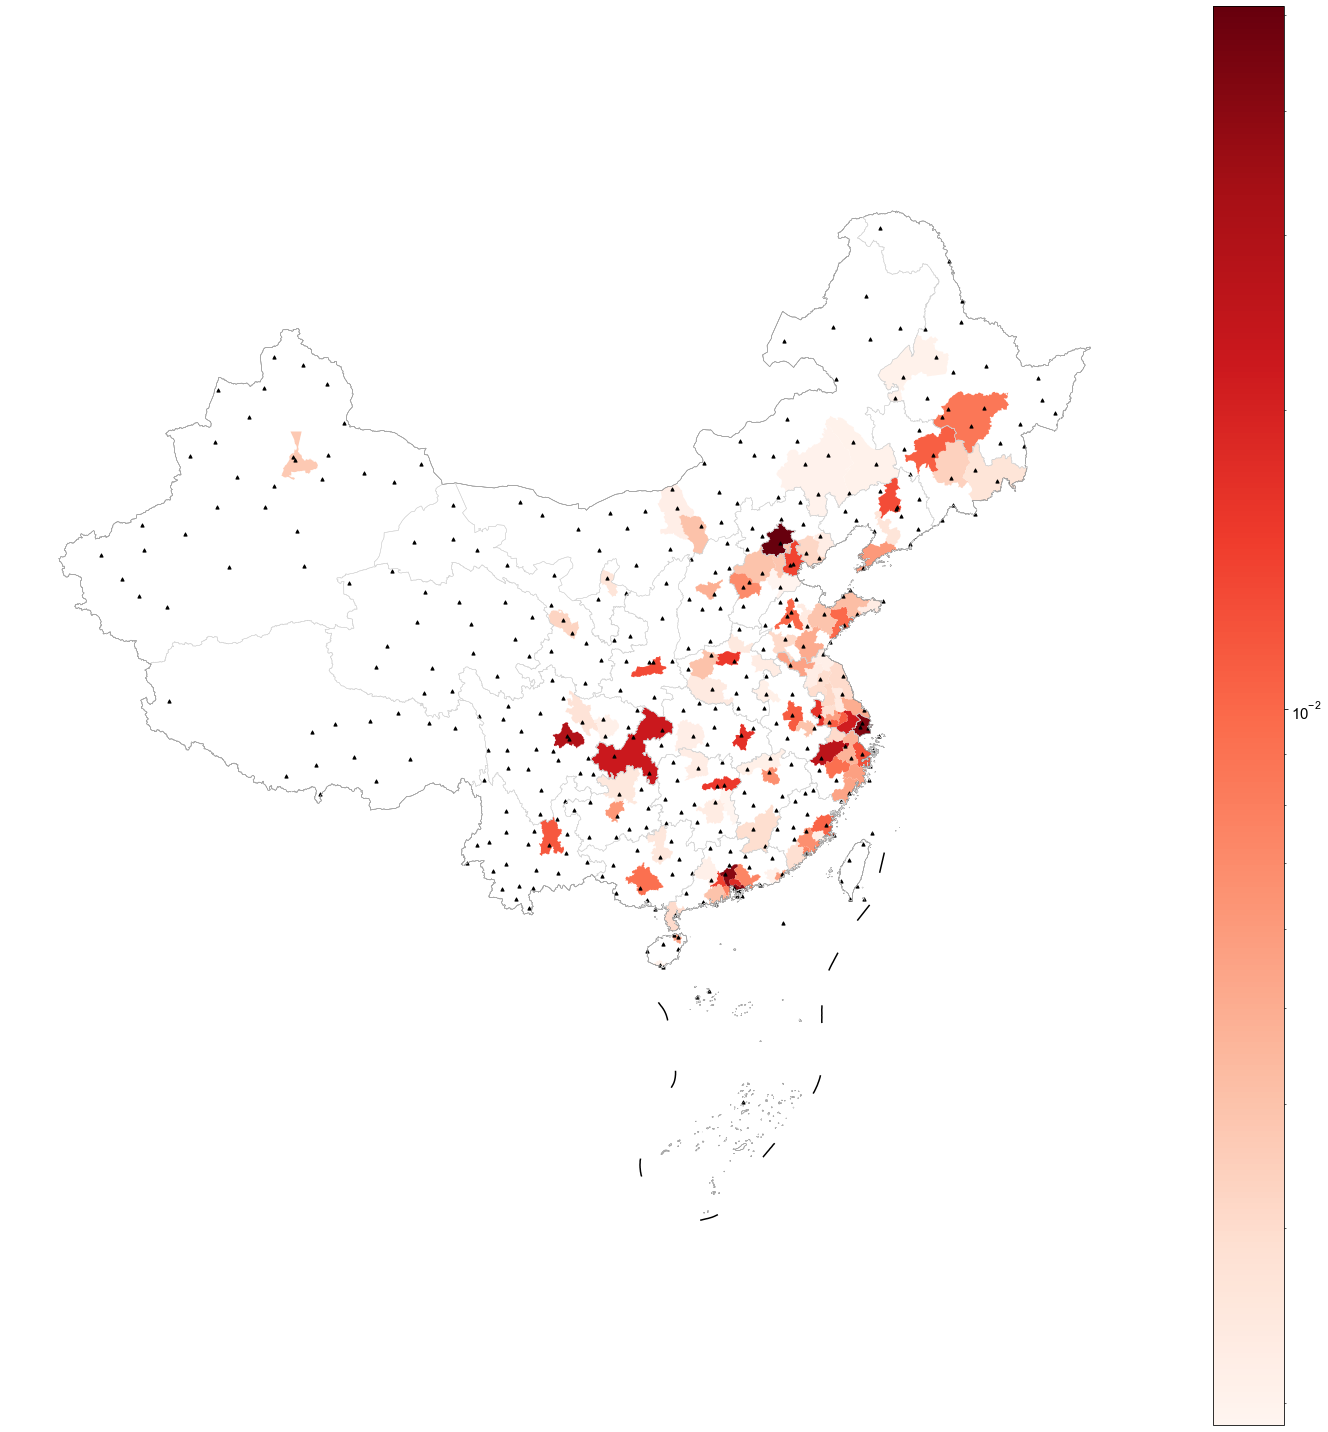

In [14]:
from matplotlib.colors import LogNorm
china_map_draw = pd.merge(china_map, city_order_nums, left_on = '地名', right_on = 'city_name', how = 'left')
fig, ax = plt.subplots(figsize = (20, 20))
china_map_draw.to_crs('EPSG:3857').plot(ax = ax, lw = 0, column = 'order_cnt', cmap = 'Reds', legend = True, norm=LogNorm(vmin = 0.0019, vmax = 0.051))
jiuduanxian.to_crs('EPSG:3857').plot(ax = ax, color = 'black')
guojie.boundary.to_crs('EPSG:3857').plot(ax = ax, color = 'black', lw = 0.5)
china_province_map.boundary.to_crs('EPSG:3857').plot(ax = ax, color = 'lightgrey', lw = 0.5)
ax.axis('off')

gdfs.to_crs('EPSG:3857').plot(ax = ax, color = 'black', markersize = 10, marker = '^')

cb_ax = fig.axes[1] 
cb_ax.set_yticks([0.01])
cb_ax.tick_params(labelsize=15)
plt.tight_layout()
plt.show()